In [1]:
import tensorflow as tf
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

[]


In [3]:
import cv2
import imghdr

C:\Users\Akshat Singhal\AppData\Local\Temp\ipykernel_29124\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [12]:
data_dir = 'data'
img_ext = ['jpeg', 'jpg', 'png']


In [13]:
os.listdir(data_dir)

['cat', 'dog']

In [14]:
for img_class in os.listdir(data_dir):
    for img in os.listdir(os.path.join(data_dir, img_class)):
        img_path = os.path.join(data_dir, img_class, img)
        try:
            img = cv2.imread(img_path)
            tip = imghdr.what(img_path)
            if tip not in img_ext:
                print('Image not in ext list{}'.format(img_path))
                os.remove(img_path)
        except Exception as e:
            print('Issue with image {}'.format(img_path))

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [15]:
data = tf.keras.utils.image_dataset_from_directory('data')
# data_iterator = data.as_numpy_iterator()
# batch = data_iterator.next()

Found 6011 files belonging to 2 classes.


In [148]:
# print(batch[1])

# fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
# for idx, img in enumerate(batch[0][:4]):
#     ax[idx].imshow(img.astype(int))
#     ax[idx].title.set_text(batch[1][idx])

In [16]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.3137255 , 0.34509805, 0.25490198],
          [0.31538755, 0.34676012, 0.25656402],
          [0.31764707, 0.34901962, 0.25882354],
          ...,
          [0.1349861 , 0.15067238, 0.14675081],
          [0.16979265, 0.17644094, 0.17477886],
          [0.14846447, 0.14846447, 0.14846447]],
 
         [[0.3137255 , 0.34509805, 0.25490198],
          [0.31538755, 0.34676012, 0.25656402],
          [0.31764707, 0.34901962, 0.25882354],
          ...,
          [0.10480511, 0.12049139, 0.11656982],
          [0.13490115, 0.14154942, 0.13988736],
          [0.11858916, 0.11858916, 0.11858916]],
 
         [[0.3137255 , 0.34509805, 0.25490198],
          [0.31538755, 0.34676012, 0.25656402],
          [0.31764707, 0.34901962, 0.25882354],
          ...,
          [0.0898046 , 0.10549088, 0.10156931],
          [0.10393689, 0.11058517, 0.1089231 ],
          [0.08695319, 0.08695319, 0.08695319]],
 
         ...,
 
         [[0.44799626, 0.45976096, 0.37740803],
          [0.45530

In [17]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2) + 1
test_size = int(len(data)*.1) + 1

In [18]:
print(train_size, val_size, test_size)

131 38 19


In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [21]:
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (2,2), 1, activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D())

# Second layer
model.add(Conv2D(32, (2,2), 1, activation = 'relu'))
model.add(MaxPooling2D())

# Thrid layer
model.add(Conv2D(64, (2,2), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dropout(0.75))

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [22]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 255, 255, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 64)       0

In [24]:
hist = model.fit(train, epochs = 10, validation_data = val)

Epoch 1/10


131/131 [==============================] - 125s 942ms/step - loss: 0.6742 - accuracy: 0.5847 - val_loss: 0.6198 - val_accuracy: 0.6472
Epoch 2/10
131/131 [==============================] - 116s 885ms/step - loss: 0.6163 - accuracy: 0.6565 - val_loss: 0.6109 - val_accuracy: 0.6678
Epoch 3/10
131/131 [==============================] - 119s 908ms/step - loss: 0.5875 - accuracy: 0.6875 - val_loss: 0.5604 - val_accuracy: 0.7220
Epoch 4/10
131/131 [==============================] - 124s 944ms/step - loss: 0.5330 - accuracy: 0.7238 - val_loss: 0.5741 - val_accuracy: 0.6809
Epoch 5/10
131/131 [==============================] - 143s 1s/step - loss: 0.4870 - accuracy: 0.7636 - val_loss: 0.5230 - val_accuracy: 0.7434
Epoch 6/10
131/131 [==============================] - 144s 1s/step - loss: 0.4505 - accuracy: 0.7860 - val_loss: 0.5151 - val_accuracy: 0.7525
Epoch 7/10
131/131 [==============================] - 146s 1s/step - loss: 0.4077 - accuracy: 0.8151 - val_loss: 0.5129 - val_accuracy: 0.758

<function matplotlib.pyplot.show(close=None, block=None)>

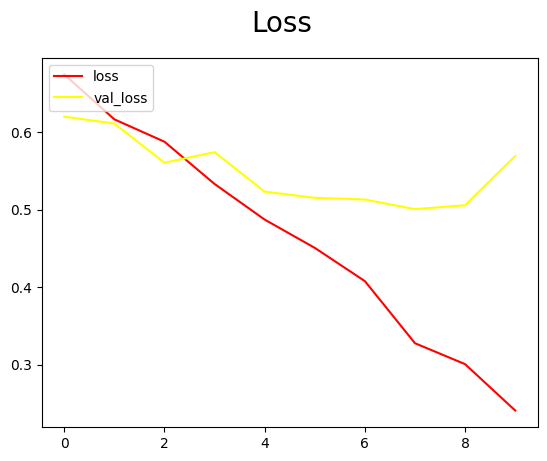

In [25]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'red', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'yellow', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = "upper left")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

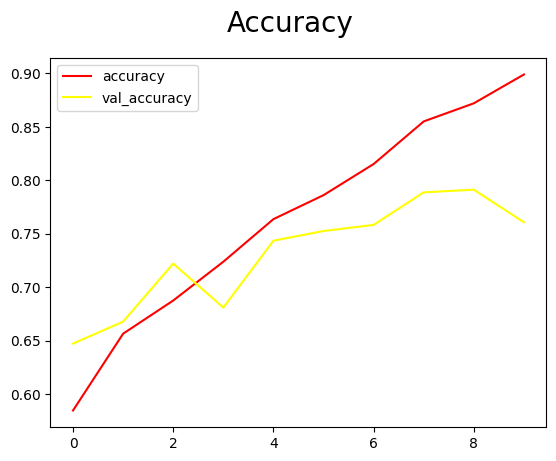

In [26]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'red', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'yellow', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = "upper left")
plt.show

In [28]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [29]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 235ms/step


In [30]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.7802690863609314, Recall: 0.587837815284729, Accuracy: 0.7164179086685181


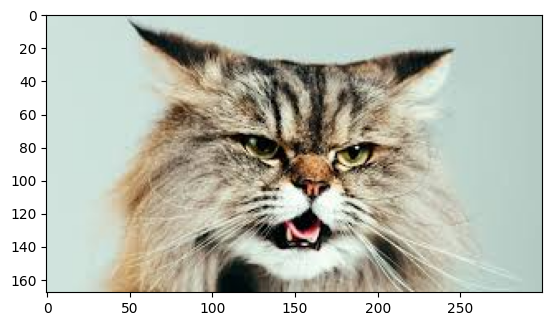

In [31]:
img = cv2.imread('cta.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

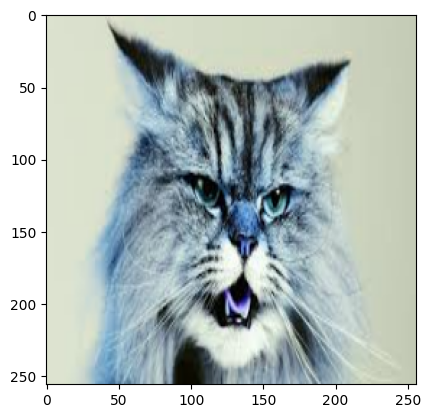

In [32]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [33]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 37ms/step


array([[0.8921011]], dtype=float32)

In [34]:
if yhat > 0.5:
    print("Predicted class is Dog")
else:
    print("Predicetd class is Cat")

Predicted class is Dog
